In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from scipy import stats
import joblib




In [ ]:

# Loading the dataset
df = pd.read_csv('/content/Life Expectancy Data.csv')





In [ ]:
# Verifying column names
print("Original columns in dataset:")
print(df.columns.tolist())


Original columns in dataset:
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
# Data Cleaning
# Fill missing values with median for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3617655307.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Fill missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



/tmp/ipython-input-4211036449.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Convert categorical variables to numerical
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])


In [ ]:
# Verify no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())




Missing values after cleaning:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
# Exploratory Data Analysis (EDA)
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
              Year       Status  Life expectancy   Adult Mortality  \
count  2938.000000  2938.000000       2938.000000      2938.000000   
mean   2007.518720     0.825732         69.234717       164.725664   
std       4.613841     0.379405          9.509115       124.086215   
min    2000.000000     0.000000         36.300000         1.000000   
25%    2004.000000     1.000000         63.200000        74.000000   
50%    2008.000000     1.000000         72.100000       144.000000   
75%    2012.000000     1.000000         75.600000       227.000000   
max    2015.000000     1.000000         89.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000             2938.000000  2938.000000   
mean       30.303948     4.546875              738.251295    83.022124   
std       117.926501     3.921946             1987.914858    22.996984   
min         0.000000     0.010000                0.000

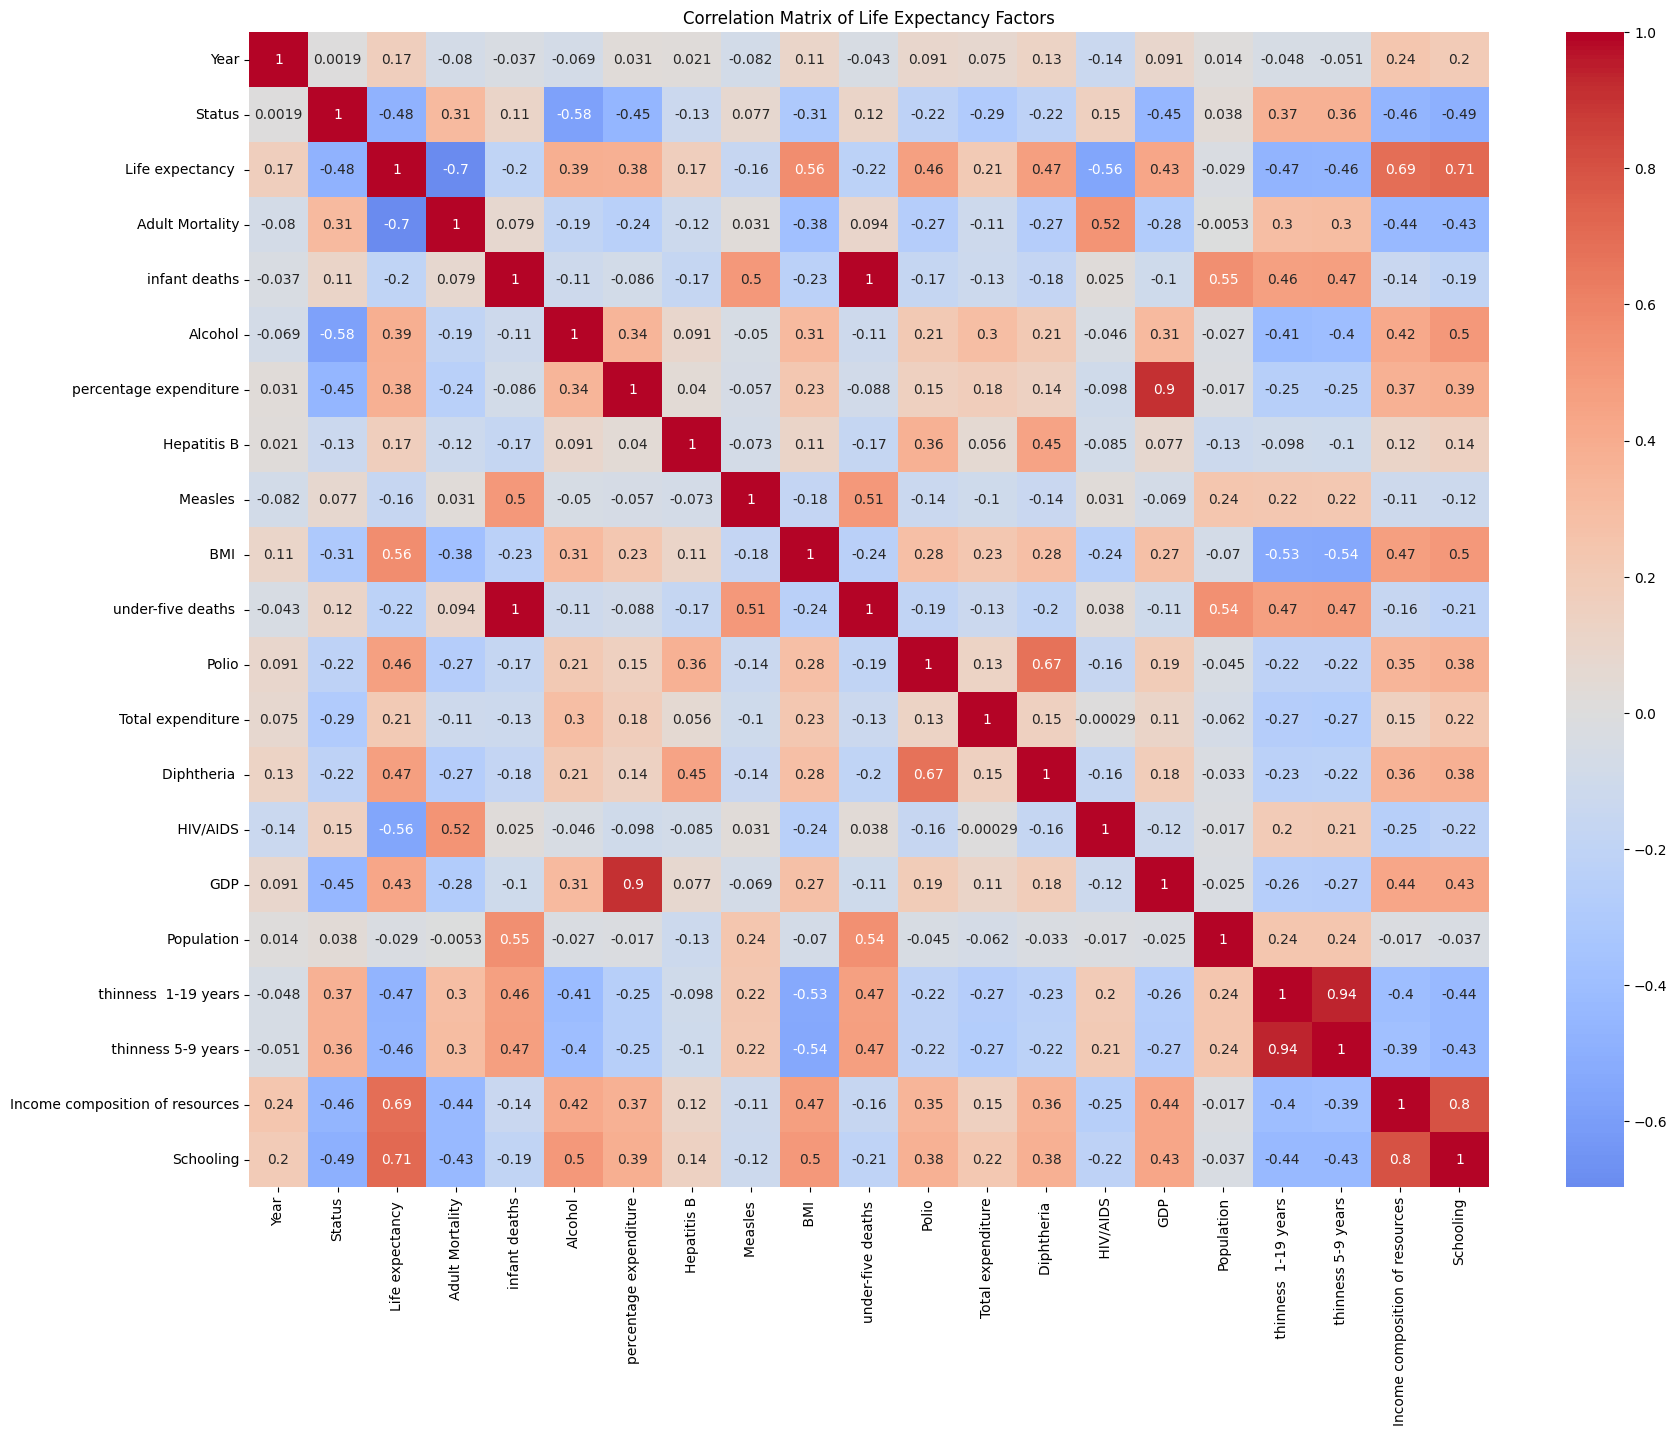

In [ ]:
# Correlation matrix with  columns (numerical columns only)
plt.figure(figsize=(20, 15))

# Selecting  only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Life Expectancy Factors')
plt.show()


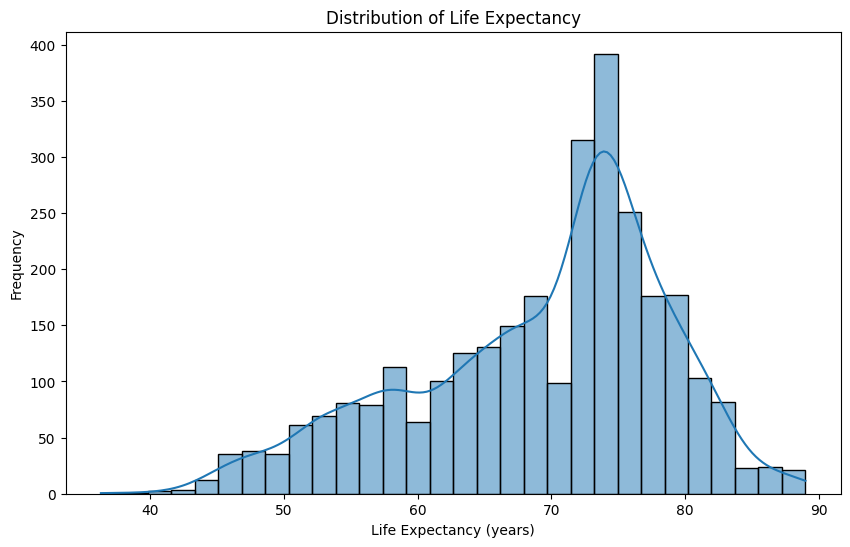

In [ ]:
# Question no.1. Do various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting life expectancy
# Distribution of Life Expectancy (with  columns)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()



In [ ]:

# Feature importance analysis with exact columns
X = df.drop(['Life expectancy ', 'Country', 'Year'], axis=1)
y = df['Life expectancy ']




In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training our model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

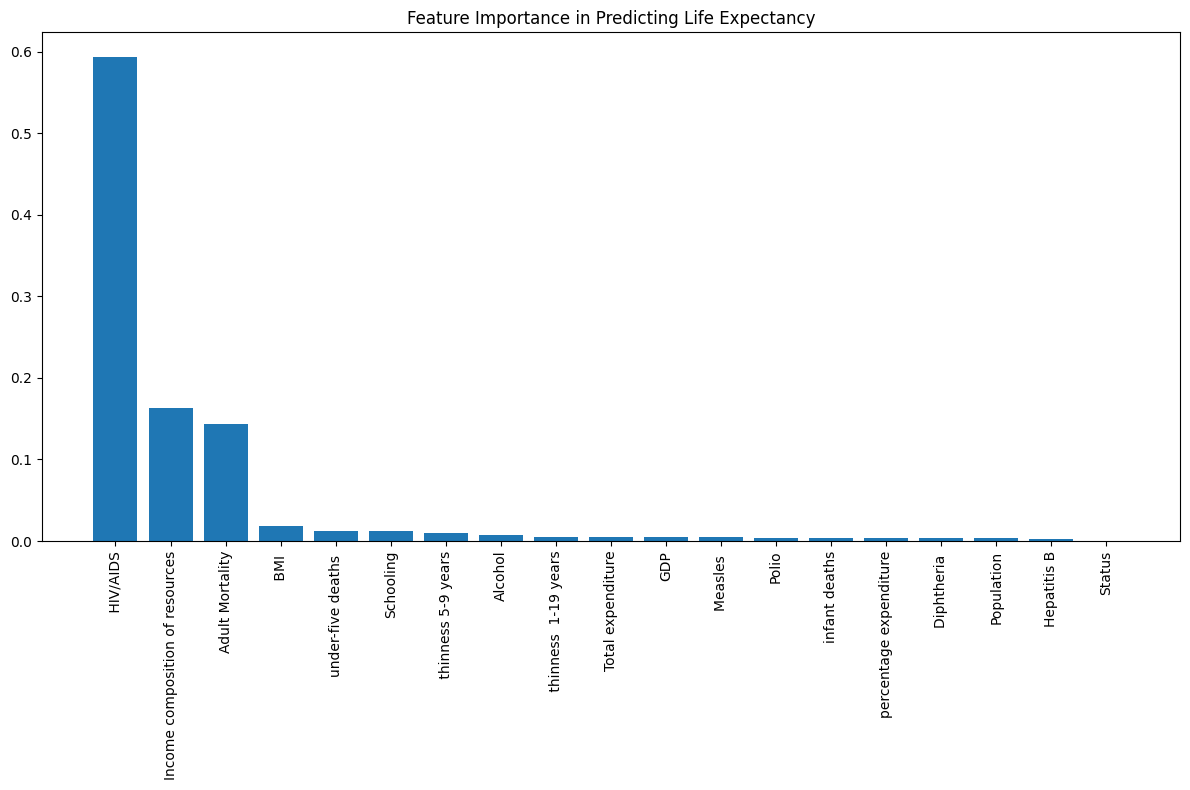

In [ ]:
# Feature importance with  column names
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance in Predicting Life Expectancy')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()





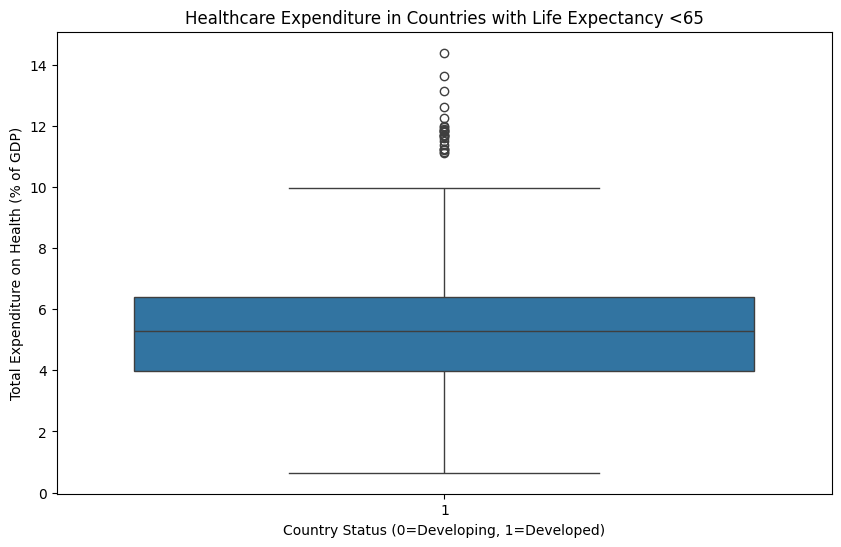

In [ ]:
# Question no.2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
# Analysis of healthcare expenditure for low life expectancy countries
low_le = df[df['Life expectancy '] < 65]
high_le = df[df['Life expectancy '] >= 65]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Total expenditure', data=low_le)
plt.title('Healthcare Expenditure in Countries with Life Expectancy <65')
plt.xlabel('Country Status (0=Developing, 1=Developed)')
plt.ylabel('Total Expenditure on Health (% of GDP)')
plt.show()


Text(0.5, 1.0, 'Adult Mortality vs Life Expectancy')

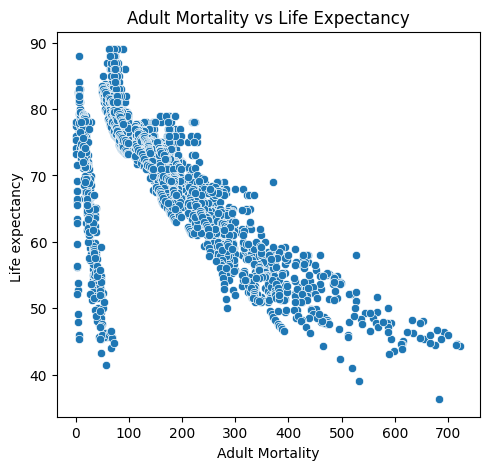

In [ ]:
#Question no. 3. How does Infant and Adult mortality rates affect life expectancy?
# Mortality analysis with  Adult Morality
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)
plt.title('Adult Mortality vs Life Expectancy')




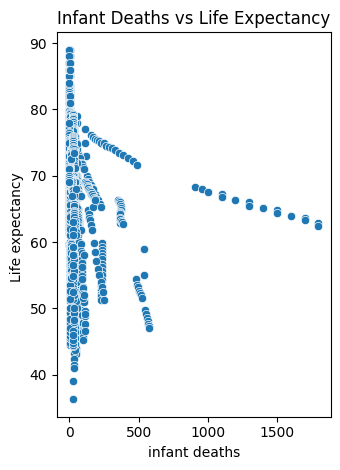

In [ ]:
# Now Infant Deaths
plt.subplot(1, 2, 2)
sns.scatterplot(x='infant deaths', y='Life expectancy ', data=df)
plt.title('Infant Deaths vs Life Expectancy')
plt.tight_layout()
plt.show()




In [ ]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


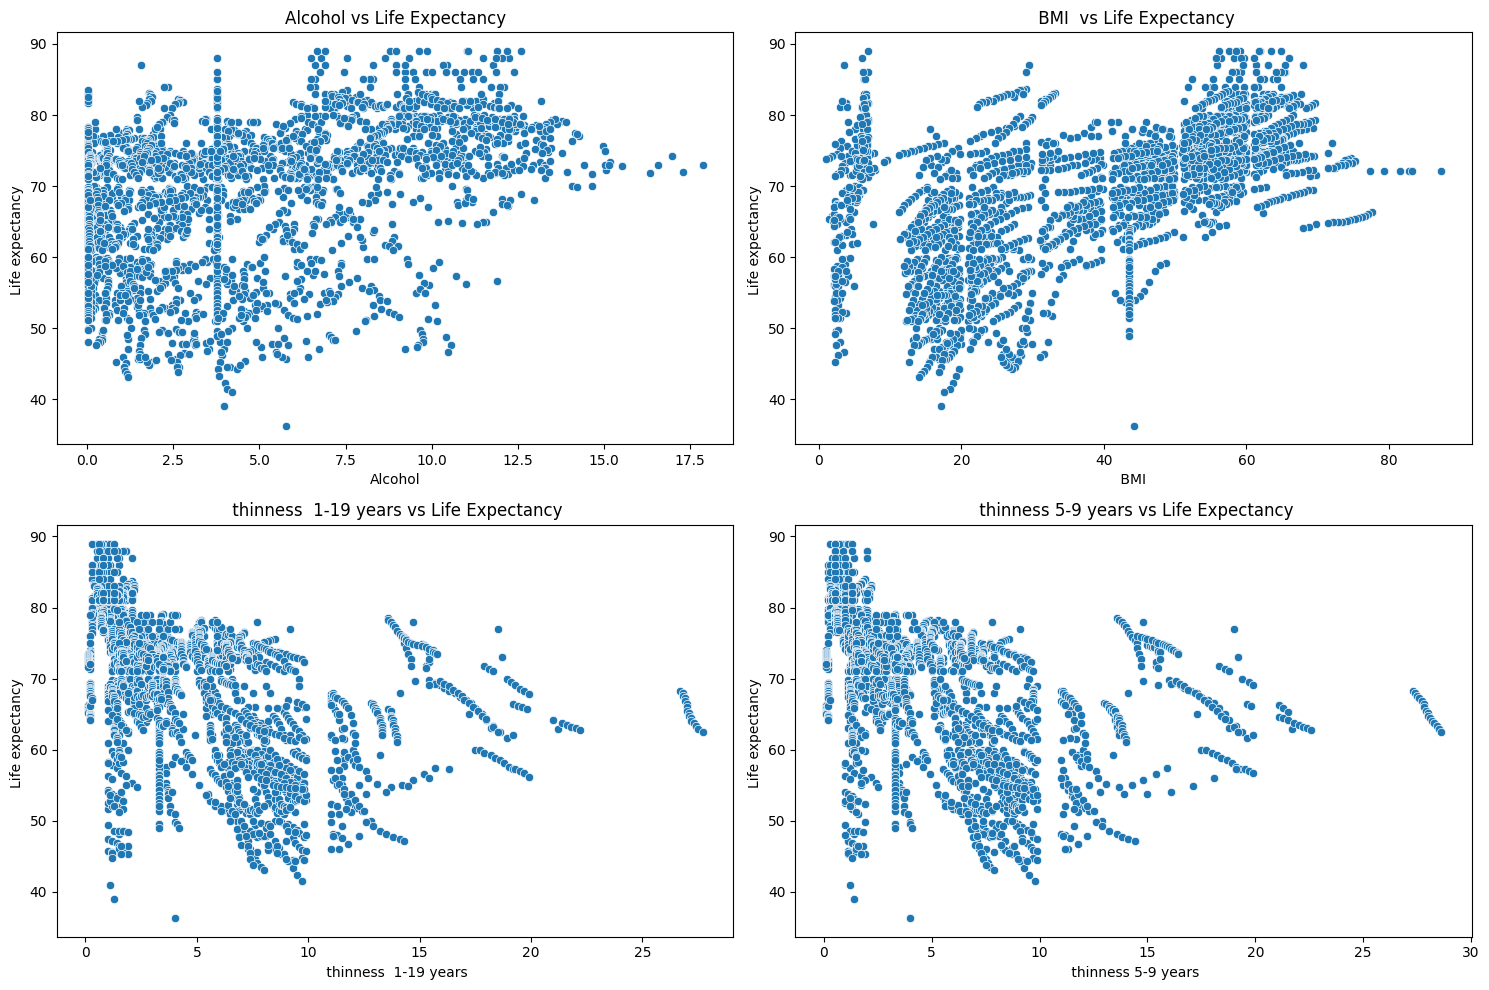

In [ ]:
# Question no.4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc ?
# Lifestyle factors with  Life Expentancy( Alcohal, BMI, 1-19 Years, 1-5 Years)
lifestyle_factors = ['Alcohol', ' BMI ', ' thinness  1-19 years', ' thinness 5-9 years']
plt.figure(figsize=(15, 10))
for i, factor in enumerate(lifestyle_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=factor, y='Life expectancy ', data=df)
    plt.title(f'{factor} vs Life Expectancy')
plt.tight_layout()
plt.show()





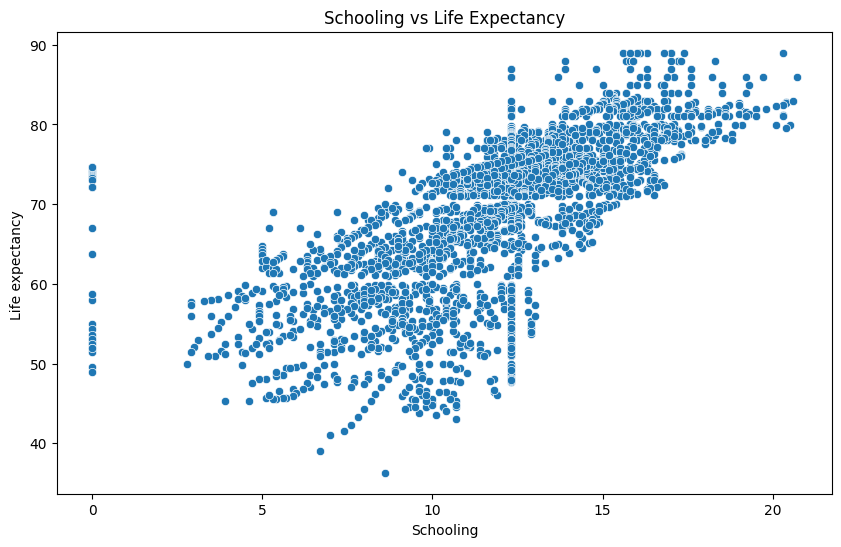

In [ ]:
# Question no. 5. What is the impact of schooling on the lifespan of humans?
# Schooling impact Vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=df)
plt.title('Schooling vs Life Expectancy')
plt.show()




Correlation between Life Expectancy and Alcohol consumption: 0.389 (positive relationship)


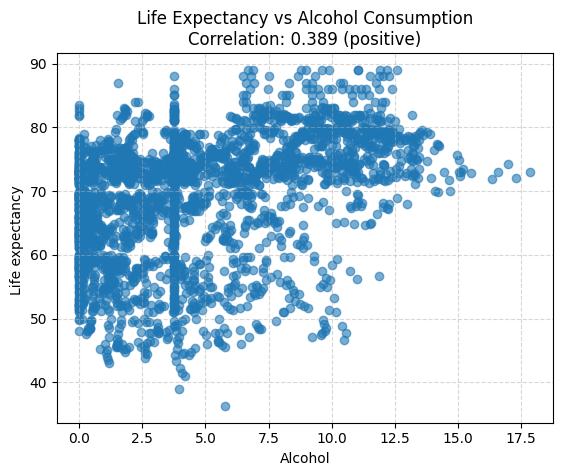

In [ ]:
# Question no.06.  Does Life Expectancy have positive or negative relationship with drinking alcohol?
# Identify correct alcohol and life expectancy columns
alcohol_col = [c for c in df.columns if "alcohol" in c.lower()]
life_col = [c for c in df.columns if "life" in c.lower() and "expect" in c.lower()]

if alcohol_col and life_col:
    alcohol_col = alcohol_col[0]
    life_col = life_col[0]

    # Calculate correlation
    corr = df[life_col].corr(df[alcohol_col])
    relation = "positive" if corr > 0 else "negative"
    print(f"Correlation between Life Expectancy and Alcohol consumption: {corr:.3f} ({relation} relationship)")

    # Scatter plot
    plt.scatter(df[alcohol_col], df[life_col], alpha=0.6)
    plt.title(f"Life Expectancy vs Alcohol Consumption\nCorrelation: {corr:.3f} ({relation})")
    plt.xlabel(alcohol_col)
    plt.ylabel(life_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Alcohol or Life Expectancy column not found.")

Correlation between Life Expectancy and Population Density: -0.029 (negative relationship)


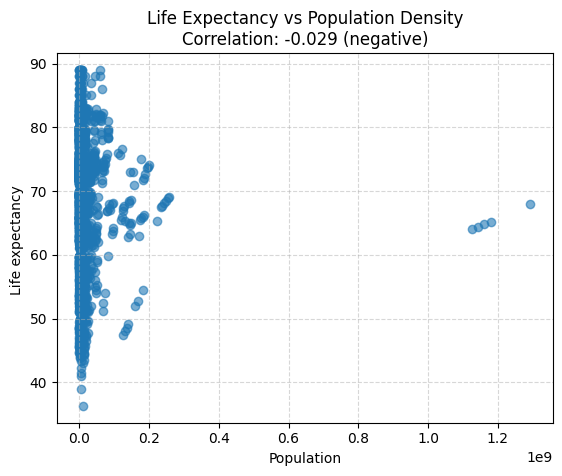

In [ ]:
# Question no.07. Do densely populated countries tend to have lower life expectancy?
# Identify population density and life expectancy columns
pop_density_col = [c for c in df.columns if "density" in c.lower() or "population" in c.lower()]
life_col = [c for c in df.columns if "life" in c.lower() and "expect" in c.lower()]

if pop_density_col and life_col:
    pop_density_col = pop_density_col[0]
    life_col = life_col[0]

    # Calculate correlation
    corr = df[life_col].corr(df[pop_density_col])
    relation = "positive" if corr > 0 else "negative"
    print(f"Correlation between Life Expectancy and Population Density: {corr:.3f} ({relation} relationship)")

    # Scatter plot
    plt.scatter(df[pop_density_col], df[life_col], alpha=0.6)
    plt.title(f"Life Expectancy vs Population Density\nCorrelation: {corr:.3f} ({relation})")
    plt.xlabel(pop_density_col)
    plt.ylabel(life_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Population density or Life Expectancy column not found.")

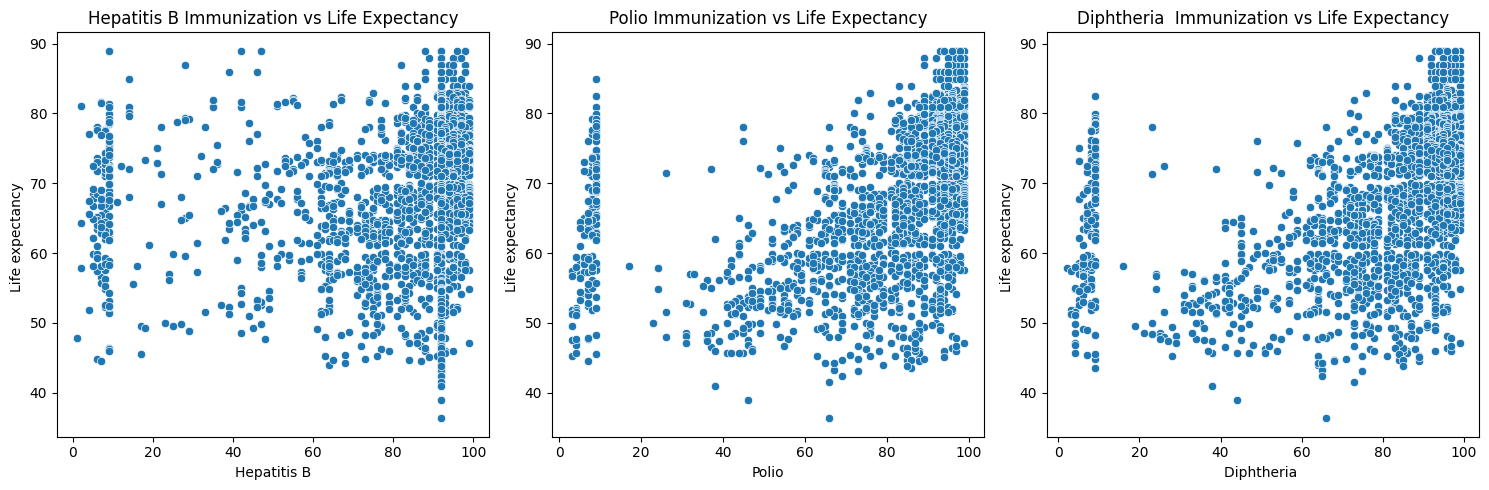

In [ ]:
# Question no. 8. What is the impact of Immunization coverage on life Expectancy?
# Immunization analysis Vs Life Expectancy
immunization = ['Hepatitis B', 'Polio', 'Diphtheria ']
plt.figure(figsize=(15, 5))
for i, vaccine in enumerate(immunization, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=vaccine, y='Life expectancy ', data=df)
    plt.title(f'{vaccine} Immunization vs Life Expectancy')
plt.tight_layout()
plt.show()




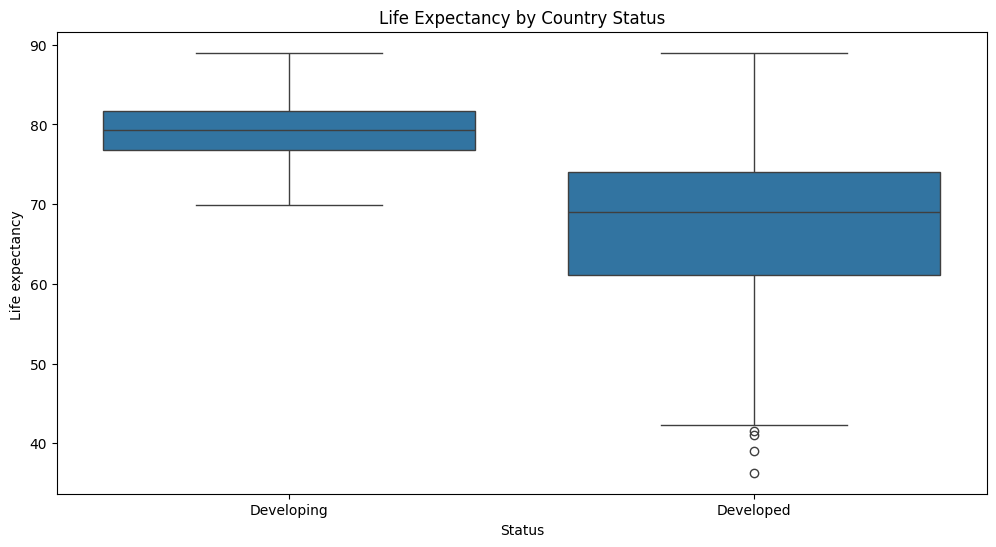

In [ ]:
# Developed vs Developing countries comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy by Country Status')
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.show()

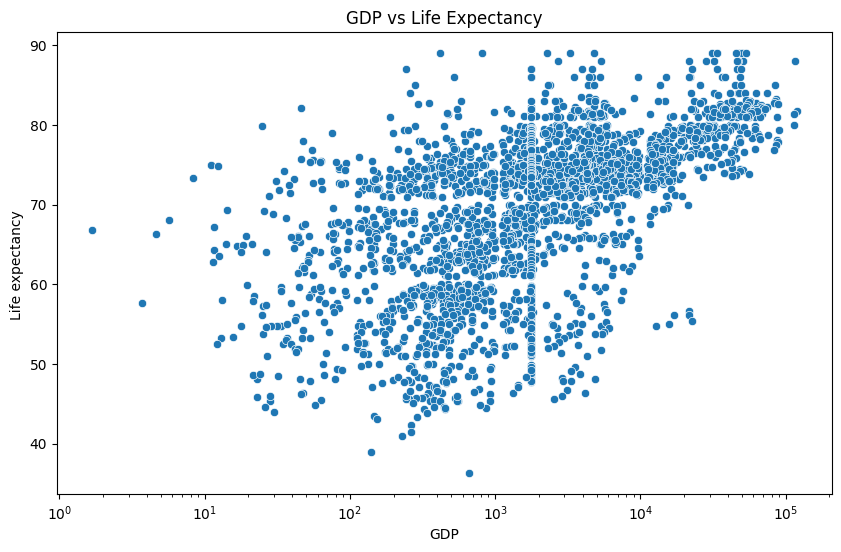

In [ ]:
# GDP analysis Vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('GDP vs Life Expectancy')
plt.xscale('log')
plt.show()

In [ ]:

# Final summary
print("\nKey Findings:")



Key Findings:


In [ ]:
print("1. Top factors affecting life expectancy:")

1. Top factors affecting life expectancy:


In [ ]:
for i in range(5):
    print(f"   - {features[indices[i]]} (importance: {importances[indices[i]]:.3f})")

   -  HIV/AIDS (importance: 0.594)
   - Income composition of resources (importance: 0.164)
   - Adult Mortality (importance: 0.144)
   -  BMI  (importance: 0.018)
   - under-five deaths  (importance: 0.013)


In [ ]:

print(f"\n2. Adult Mortality correlation: {df['Life expectancy '].corr(df['Adult Mortality']):.3f}")



2. Adult Mortality correlation: -0.696


In [ ]:
print(f"   Infant Deaths correlation: {df['Life expectancy '].corr(df['infant deaths']):.3f}")

   Infant Deaths correlation: -0.197


In [ ]:

print("\n3. Lifestyle factors:")




3. Lifestyle factors:


In [ ]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
print(f"   - BMI correlation: {df['Life expectancy '].corr(df[' BMI ']):.3f}")

   - BMI correlation: 0.557


In [ ]:
print(f"   - Alcohol correlation: {df['Life expectancy '].corr(df['Alcohol']):.3f}")

   - Alcohol correlation: 0.389


In [ ]:
print("\n4. Immunization correlations:")



4. Immunization correlations:


In [ ]:
for vaccine in immunization:
    print(f"   - {vaccine}: {df['Life expectancy '].corr(df[vaccine]):.3f}")

   - Hepatitis B: 0.170
   - Polio: 0.458
   - Diphtheria : 0.472


In [ ]:
# Saving model & feature names
joblib.dump((rf, list(X.columns)), "life_expectancy_model.pkl")

print("Model trained and saved successfully!")

Model trained and saved successfully!
